<a href="https://colab.research.google.com/github/Tanuka-Mondal/Fuzzy/blob/main/fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 5.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=b354a890d496996b02f8b2d1d14ded28a3fcee50829b7599584eb97efa96826c
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [4]:
import matplotlib.pyplot as plt

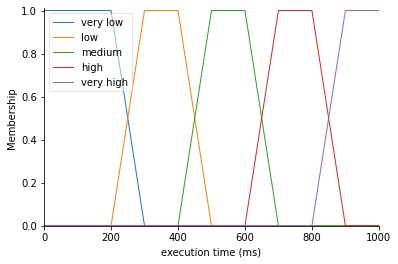

In [5]:
ei = ctrl.Antecedent(np.arange(0,1001,1),'execution time (ms)') #mili second
ei['very low'] = fuzzy.trapmf(ei.universe,[0,0,200,300])
ei['low'] = fuzzy.trapmf(ei.universe,[200,300,400,500])
ei['medium'] = fuzzy.trapmf(ei.universe,[400,500,600,700])
ei['high'] = fuzzy.trapmf(ei.universe,[600,700,800,900])
ei['very high'] = fuzzy.trapmf(ei.universe,[800,900,1000,1000])
ei.view()

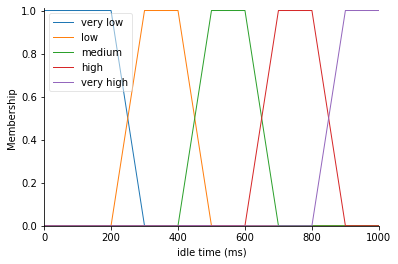

In [6]:
Ii = ctrl.Antecedent(np.arange(0,1001,1),'idle time (ms)')
Ii['very low'] = fuzzy.trapmf(Ii.universe,[0,0,200,300])
Ii['low'] = fuzzy.trapmf(Ii.universe,[200,300,400,500])
Ii['medium'] = fuzzy.trapmf(Ii.universe,[400,500,600,700])
Ii['high'] = fuzzy.trapmf(Ii.universe,[600,700,800,900])
Ii['very high'] = fuzzy.trapmf(Ii.universe,[800,900,1000,1000])
Ii.view()

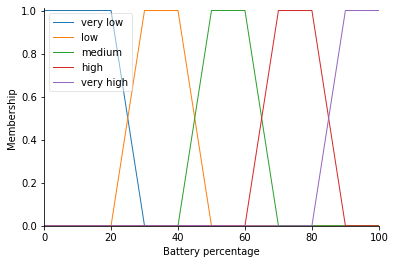

In [7]:
bi = ctrl.Antecedent(np.arange(0,101,1),'Battery percentage')
bi['very low'] = fuzzy.trapmf(bi.universe,[0,0,20,30])
bi['low'] = fuzzy.trapmf(bi.universe,[20,30,40,50])
bi['medium'] = fuzzy.trapmf(bi.universe,[40,50,60,70])
bi['high'] = fuzzy.trapmf(bi.universe,[60,70,80,90])
bi['very high'] = fuzzy.trapmf(bi.universe,[80,90,100,100])
bi.view()

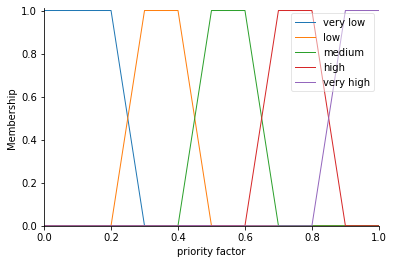

In [8]:
pi = ctrl.Antecedent(np.arange(0,1.1,0.1),'priority factor')
pi['very low'] = fuzzy.trapmf(pi.universe,[0,0,0.2,0.3])
pi['low'] = fuzzy.trapmf(pi.universe,[0.2,0.3,0.4,0.5])
pi['medium'] = fuzzy.trapmf(pi.universe,[0.4,0.5,0.6,0.7])
pi['high'] = fuzzy.trapmf(pi.universe,[0.6,0.7,0.8,0.9])
pi['very high'] = fuzzy.trapmf(pi.universe,[0.8,0.9,1,1])
pi.view()

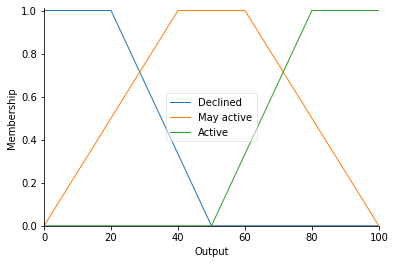

In [21]:
si = ctrl.Consequent(np.arange(0,101,1),'Output')
#names = ['Declined','May active','Active']
#si.automf(names = names)
si['Declined'] = fuzzy.trapmf(si.universe,[0,0,20,50])
si['May active'] = fuzzy.trapmf(si.universe,[0,40,60,100])
si['Active'] = fuzzy.trapmf(si.universe,[50,80,100,100])
si.view()

In [16]:
rule1 = ctrl.Rule(ei['very low'] & Ii['very high'] & pi['very high'] & bi['very high'],si['Active'])
rule2 = ctrl.Rule(ei['very high'] & Ii['very low'] & pi['very low'] & bi['very low'],si['Declined'])

In [17]:
op = ctrl.ControlSystem([rule1,rule2])
Sensor = ctrl.ControlSystemSimulation(op)

In [18]:
def SensorOutput():
  Sensor.input['execution time (ms)'] = float(input("execution time: "))
  Sensor.input['idle time (ms)'] = float(input("idle time: "))
  Sensor.input['priority factor'] = float(input("priority factor: "))
  Sensor.input['Battery percentage'] = float(input("battery percentage: "))
  Sensor.compute()
  #print(Tip.output['Output'])
  print("chance of activation of sensor: "+'{0:.6g}'.format(Sensor.output['Output']) + "%")
  si.view(sim=Sensor)

execution time: 100
idle time: 900
priority factor: 0.9
battery percentage: 95
chance of activation of sensor: 81.4286%


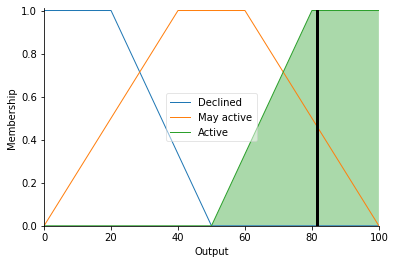

In [19]:
SensorOutput()

execution time: 1000
idle time: 0
priority factor: 0
battery percentage: 0
chance of activation of sensor: 18.5714%


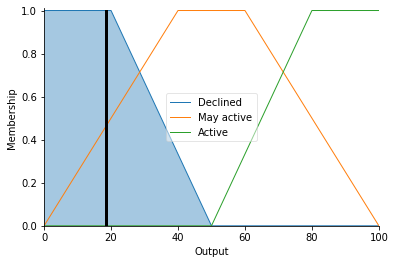

In [20]:
SensorOutput()